In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
wego = pd.read_csv("../data/headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head(1)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.5,NaN


In [3]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

1. What is the overall on-time performance, and what do the overall distribution of adherence look like? 

In [4]:
wego.shape

(350329, 30)

In [5]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

1. What is the overall on-time performance, and what do the overall distribution of adherence look like?

on-time is considered to be no more than 6 minutes lates and no more than one minute early

In [6]:
for ind, row in wego.iterrows(): 
    if row['ADHERENCE'] <= -6 :
       wego.loc[ind, 'on_time_performance'] = 'on_time' 
    elif row['ADHERENCE'] <= 1:
       wego.loc[ind, 'on_time_performance'] ='on_time'
    elif row['ADHERENCE'] > -6 :
       wego.loc[ind, 'on_time_performance'] ='late'
    elif row['ADHERENCE'] > 1:
       wego.loc[ind, 'on_time_performance'] ='late'
   
        

In [7]:
wego.head(11)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,on_time_performance
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,6.500000,NaN,on_time
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,on_time
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,on_time
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,NaN,0,0.000000,NaN,late
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,0,0,1,0,0.0,0,12.866666,5.0,on_time
5,120230801,1,99457895,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,on_time
6,120230801,1,99457896,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,0,0,1,0,NaN,0,0.000000,NaN,late
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,2.666666,0,0,1,0,0.0,0,13.216666,10.0,on_time
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1.966666,0,0,1,0,0.0,0,0.000000,NaN,on_time
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,on_time


In [8]:
on_time_distribution = wego['on_time_performance'].value_counts().to_frame().reset_index()

In [9]:
on_time_distribution 

,on_time_performance,count
0,on_time,305829
1,late,33032
2,nan,11468


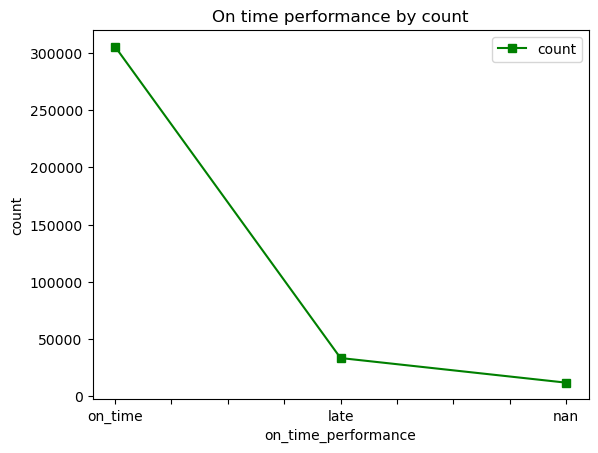

In [10]:
on_time_distribution.plot(x='on_time_performance',y='count',color = 'green', marker ='s')
plt.title('On time performance by count')
plt.ylabel('count')
plt.savefig('wego_plot.png');

C:\Users\TitanUp\AppData\Local\Temp\ipykernel_27952\1194399940.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = on_time_distribution ,  x ='on_time_performance', y = 'count',ci= None)


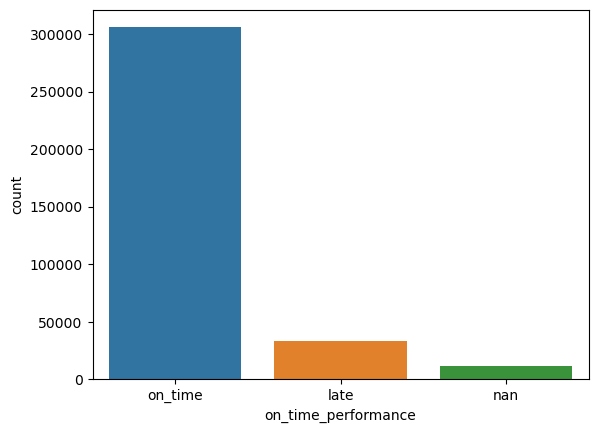

In [12]:
sns.barplot(data = on_time_distribution ,  x ='on_time_performance', y = 'count',ci= None)
plt.savefig('wego_bar_plot.png');

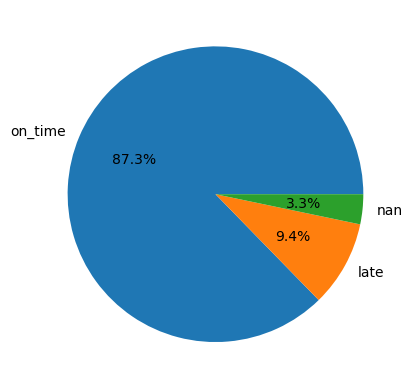

In [13]:

fig, ax = plt.subplots()
ax.pie(on_time_distribution['count'], labels=on_time_distribution['on_time_performance'], autopct='%1.1f%%')
plt.savefig('wego_pie_plot.png');

In [14]:
adherence  = wego['ADHERENCE'].value_counts().to_frame().reset_index()

In [15]:
adherence 

,ADHERENCE,count
0,0.966666,1355
1,0.950000,1341
2,-0.166666,1082
3,-0.200000,1042
4,-0.100000,1033
...,...,...
3760,-108.733333,1
3761,-111.116666,1
3762,-41.366666,1
3763,32.800000,1


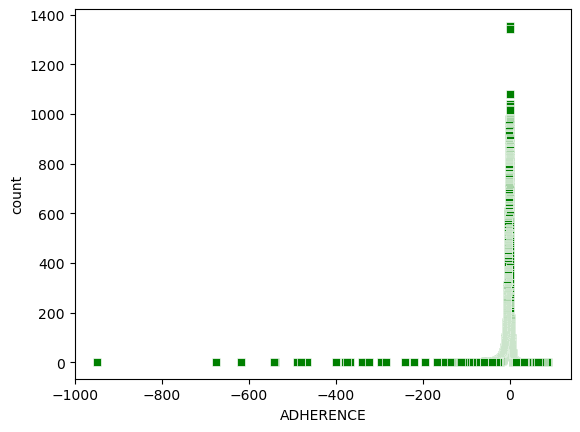

In [16]:
sns.scatterplot(data = adherence ,x = 'ADHERENCE', y='count',color = 'green', marker ='s');

C:\Users\TitanUp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


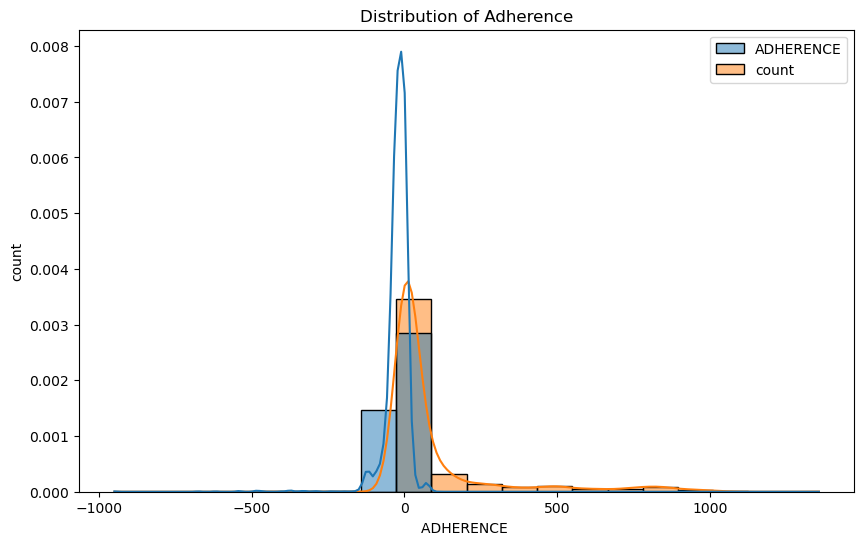

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(adherence, bins=20, kde=True, stat='density', color='blue')
plt.title('Distribution of Adherence')
plt.xlabel('ADHERENCE ')
plt.ylabel('count')
plt.show()

2.How does direction of travel, route, or location affect the on-time performance?

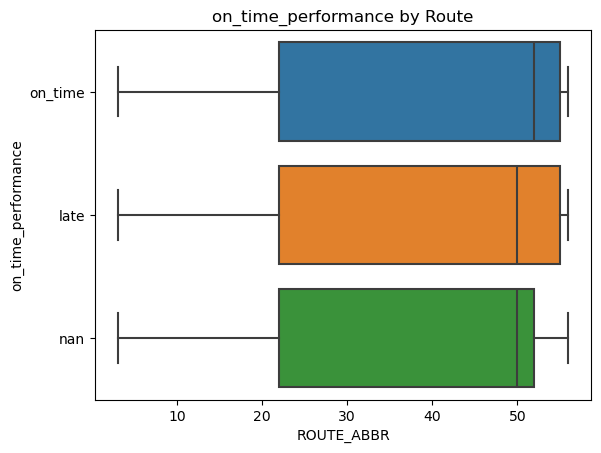

<Figure size 640x480 with 0 Axes>

In [18]:
sns.boxplot(x='ROUTE_ABBR', y='on_time_performance', data=wego)
plt.title('on_time_performance by Route')
plt.show()
plt.savefig('wego_box_plot.png');

In [19]:
wego['on-time performance']=(wego['ADJUSTED_ONTIME_COUNT'] *100)/ (
    wego['ADJUSTED_ONTIME_COUNT'] + wego['ADJUSTED_LATE_COUNT'] + wego['ADJUSTED_EARLY_COUNT']
)

In [20]:
wego.head(2)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,on_time_performance,on-time performance
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,6.5,NaN,on_time,100.0
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,0.0,NaN,on_time,100.0


In [21]:
wego['on-time performance'].value_counts().reset_index()

,on-time performance,count
0,100.0,270048
1,0.0,68813


plt.pie(wego['count'], labels = wego['on-time performance']);

In [22]:
wego.groupby('on-time performance')['ROUTE_ABBR'].median()

on-time performance
0.0      52.0
100.0    50.0
Name: ROUTE_ABBR, dtype: float64

sns.boxplot(x='ROUTE_ABBR', y='on-time performance', data=wego)
plt.title('On time Performance by  Different Routes')
plt.show()
plt.savefig('On time Performance by Different Routes_boxplot.png');

In the data, the bus route can be identified by its ROUTE_ABBR value.
3: West End
7: Hillsboro
22: Bordeaux
23: Dickerson Pike
50: Charlotte Pike
52: Nolensville Pike
55: Murfreesboro Pike
56: Gallatin Pike

In [24]:
west_end_df = wego.loc[wego['ROUTE_ABBR']== 3 ]
west_end_df.head(1)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,on_time_performance,on-time performance
1272,120230801,1,99459625,2023-08-01,3,300,2529,346048,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,8.433333,NaN,on_time,100.0


In [25]:
west_end_df.groupby('ROUTE_ABBR')['on-time performance'].median()

ROUTE_ABBR
3    100.0
Name: on-time performance, dtype: float64

In [26]:
Route_counts = wego['ROUTE_ABBR'].value_counts().reset_index()
Route_counts 

,ROUTE_ABBR,count
0,55,61944
1,56,60020
2,52,51819
3,3,47162
4,50,43291
5,23,42108
6,22,25959
7,7,18026


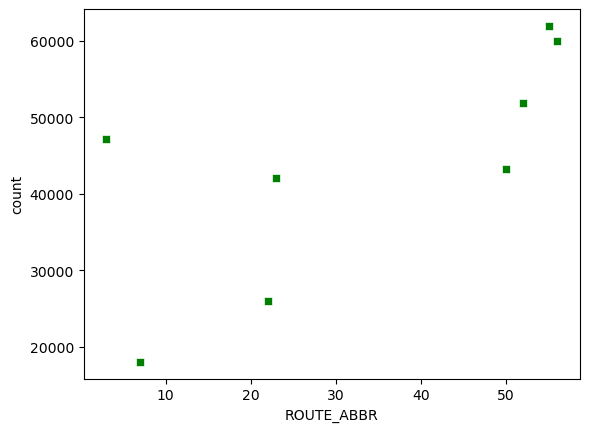

In [27]:
sns.scatterplot(data = Route_counts ,x = 'ROUTE_ABBR', y='count',color = 'green', marker ='s');

C:\Users\TitanUp\AppData\Local\Temp\ipykernel_27952\1783482175.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = Route_counts,  x ='ROUTE_ABBR', y = 'count',ci= None)


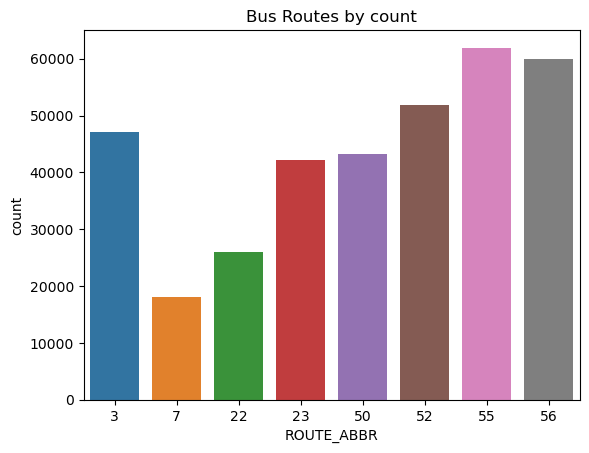

<Figure size 640x480 with 0 Axes>

In [28]:
sns.barplot(data = Route_counts,  x ='ROUTE_ABBR', y = 'count',ci= None)
plt.title('Bus Routes by count')
plt.show()
plt.savefig('wego_barplot_0_plot.png');

In [29]:
 on_time_performance_routes = wego[['ROUTE_ABBR', 'on_time_performance']] 

In [30]:
 on_time_performance_routes

,ROUTE_ABBR,on_time_performance
0,22,on_time
1,22,on_time
2,22,on_time
3,22,late
4,22,on_time
...,...,...
350324,7,on_time
350325,7,on_time
350326,7,on_time
350327,7,on_time


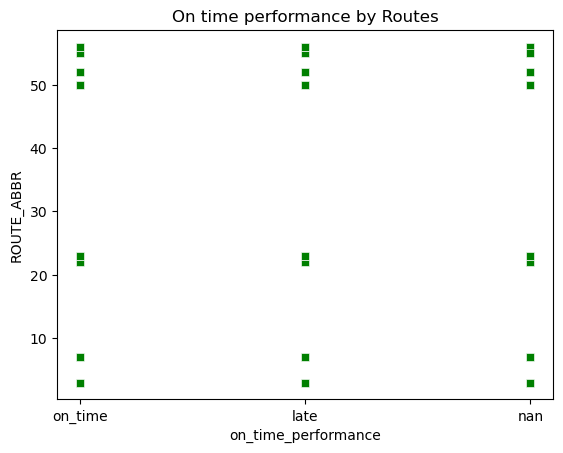

In [31]:
sns.scatterplot(data = on_time_performance_routes,x = 'on_time_performance', y='ROUTE_ABBR',color = 'green', marker ='s')
plt.title('On time performance by Routes')
plt.savefig('wego_scatter_0_plot.png');

C:\Users\TitanUp\AppData\Local\Temp\ipykernel_27952\1980676157.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = on_time_performance_routes,  x ='on_time_performance', y = 'ROUTE_ABBR',ci= None)


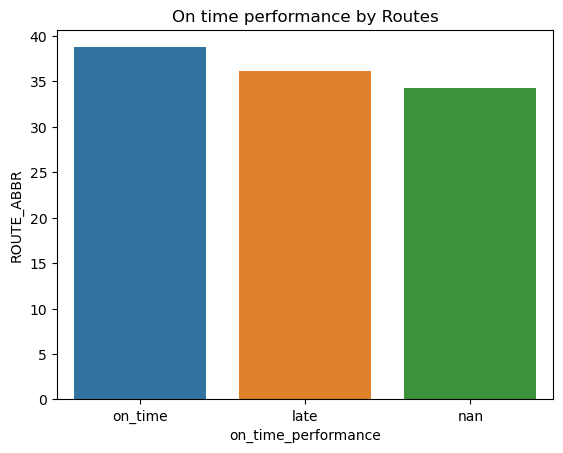

<Figure size 640x480 with 0 Axes>

In [32]:
sns.barplot(data = on_time_performance_routes,  x ='on_time_performance', y = 'ROUTE_ABBR',ci= None)
plt.title('On time performance by Routes')
plt.show()
plt.savefig('wego_barplot_10_plot.png');

In [33]:
wego.head(1)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,on_time_performance,on-time performance
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0,1,0,0.0,0,6.5,NaN,on_time,100.0


In [34]:
late_df = wego.loc[wego['on_time_performance'] == 'late'].sort_values('ROUTE_ABBR',ascending =True)

In [35]:
late_df.head(1)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,on_time_performance,on-time performance
30756,120230806,3,99602697,2023-08-06,3,300,2500,350951,0,TO DOWNTOWN,...,0,0,1,1,NaN,0,0.0,NaN,late,100.0


In [36]:
late_df['on_time_performance'].value_counts()

on_time_performance
late    33032
Name: count, dtype: int64

In [37]:
late_df['ROUTE_ABBR'].value_counts().reset_index()

,ROUTE_ABBR,count
0,56,5920
1,23,5621
2,22,5075
3,50,4106
4,55,3794
5,52,3549
6,3,3185
7,7,1782


In the data, the bus route can be identified by its ROUTE_ABBR value.
3: West End
7: Hillsboro
22: Bordeaux
23: Dickerson Pike
50: Charlotte Pike
52: Nolensville Pike
55: Murfreesboro Pike
56: Gallatin Pike

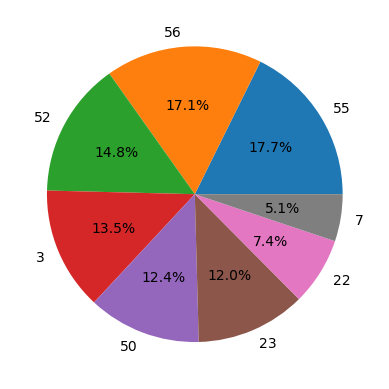

In [38]:

fig, ax = plt.subplots()
ax.pie(Route_counts['count'], labels=Route_counts['ROUTE_ABBR'], autopct='%1.1f%%')
plt.savefig('wego_pie_plot_2.png');

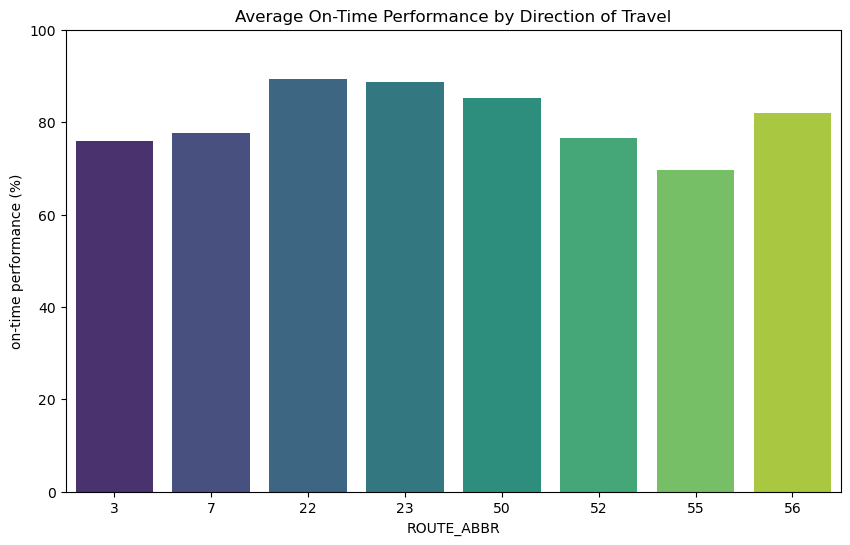

In [39]:

ONTIME_performance = wego.groupby('ROUTE_ABBR')['on-time performance'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=ONTIME_performance.index, y=ONTIME_performance.values, palette='viridis')
plt.title('Average On-Time Performance by Direction of Travel')
plt.xlabel('ROUTE_ABBR')
plt.ylabel('on-time performance (%)')
plt.ylim(0, 100)
plt.show()


wego_1 =wego.loc[wego['ROUTE_ABBR'].isin([' West End','Hillsboro','Bordeaux','Dickerson Pike','Charlotte Pike','Nolensville Pike',' Murfreesboro Pike','Gallatin Pike'])]
wego_1 = wego.value_counts(['ROUTE_ABBR'].reset_index())

                            
                           




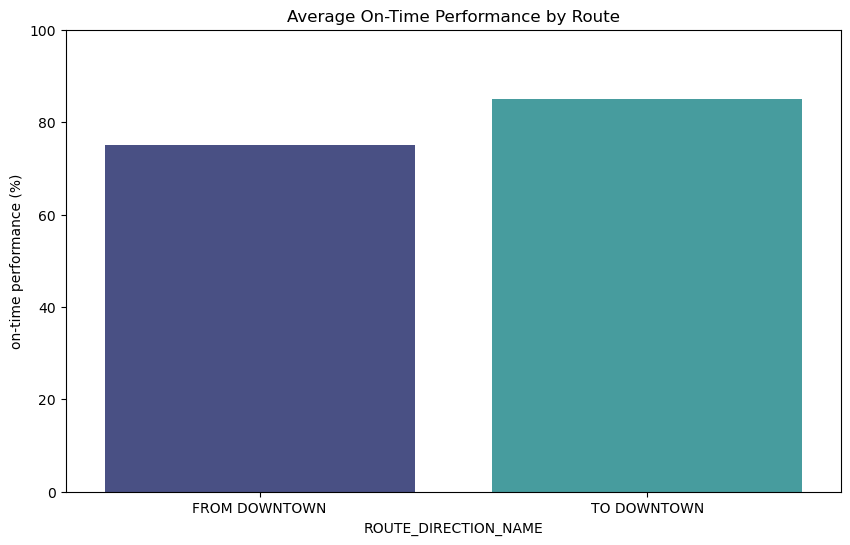

In [40]:
ROUTE_performance = wego.groupby('ROUTE_DIRECTION_NAME')['on-time performance'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x= ROUTE_performance.index, y= ROUTE_performance.values, palette='mako')
plt.title('Average On-Time Performance by Route')
plt.xlabel('ROUTE_DIRECTION_NAME')
plt.ylabel('on-time performance (%)')
plt.ylim(0, 100)
plt.show()

In [41]:
wego['Route_category'] = pd.qcut(x =wego.ROUTE_ABBR, q = 3, labels =['Low' ,'Medium', 'High']) 

In [42]:
wego.head(1)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,on_time_performance,on-time performance,Route_category
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,1,0,0.0,0,6.5,NaN,on_time,100.0,Low


In [43]:
routes_df = wego['Route_category'].value_counts().reset_index()

In [44]:
routes_df 

,Route_category,count
0,Medium,157054
1,Low,133255
2,High,60020


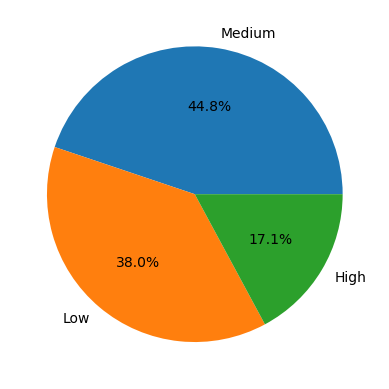

In [45]:

fig, ax = plt.subplots()
ax.pie(routes_df['count'], labels=routes_df['Route_category'], autopct='%1.1f%%')
plt.savefig('wego_pie_plot_3.png');

5.Is there any relationship between lateness (ADHERENCE) and headway deviation? The headway deviation variable is contained in the HDWY_DEV column. See the notes under number 9 for a description of headway and headway deviation.

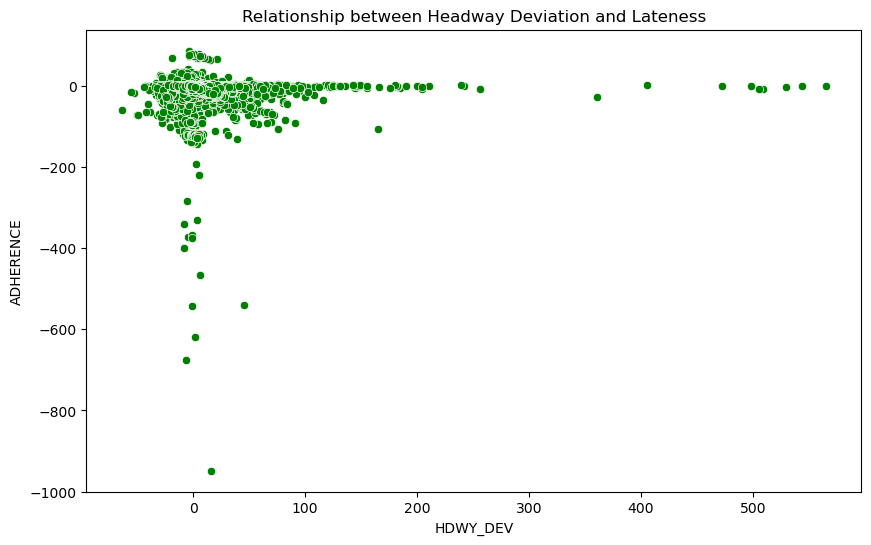

In [46]:

wego = wego[['ADHERENCE', 'HDWY_DEV']].dropna()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='HDWY_DEV', y='ADHERENCE', data= wego,color='g')
plt.title('Relationship between Headway Deviation and Lateness')
plt.xlabel('HDWY_DEV')
plt.ylabel('ADHERENCE')
plt.show()




In [47]:

correlation = wego['HDWY_DEV'].corr(wego['ADHERENCE'])
correlation

-0.20679390015312585

sns.scatterplot(data = on_time_distribution ,x = 'on_time_performance', y='count',color = 'green', marker ='s')
plt.title('On time performance by count')
plt.ylabel('count')
plt.savefig('wego_scatter_plot.png');

In the data, the bus route can be identified by its ROUTE_ABBR value. 3: West End 7: Hillsboro 22: Bordeaux 23: Dickerson Pike 50: Charlotte Pike 52: Nolensville Pike 55: Murfreesboro Pike 56: Gallatin Pike